# quant-econ Solutions: Infinite Horizon Dynamic Programming

Solutions for http://quant-econ.net/py/dp_intro.html

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import compute_fixed_point
from quantecon.models import GrowthModel

## Exercise 1

Iteration    Distance       Elapsed (seconds)
---------------------------------------------
1            4.297e+00      6.331e-02         
2            4.080e+00      1.270e-01         
Iteration    Distance       Elapsed (seconds)
---------------------------------------------
1            4.297e+00      6.849e-02         
2            4.080e+00      1.322e-01         
3            3.875e+00      1.967e-01         
4            3.680e+00      2.656e-01         
Iteration    Distance       Elapsed (seconds)
---------------------------------------------
1            4.297e+00      6.273e-02         
2            4.080e+00      1.269e-01         
3            3.875e+00      1.882e-01         
4            3.680e+00      2.572e-01         
5            3.496e+00      3.295e-01         
6            3.327e+00      4.016e-01         


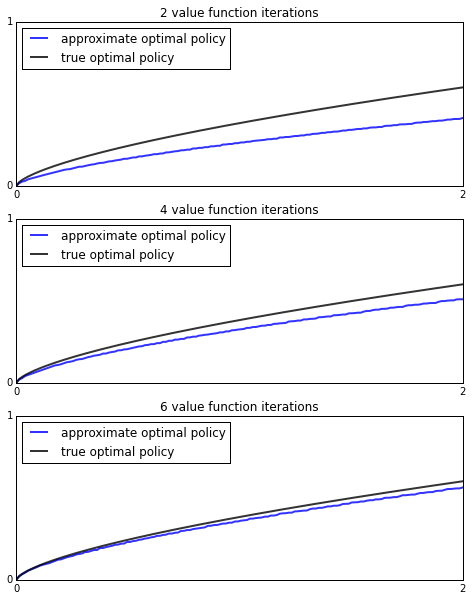

In [3]:
alpha, beta = 0.65, 0.95
gm = GrowthModel() 
true_sigma = (1 - alpha * beta) * gm.grid**alpha

fig, ax = plt.subplots(3, 1, figsize=(8, 10))

for i, n in enumerate((2, 4, 6)):
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(0, 2)
    ax[i].set_yticks((0, 1))
    ax[i].set_xticks((0, 2))

    w = 5 * gm.u(gm.grid) - 25  # Initial condition
    v_star = compute_fixed_point(gm.bellman_operator, w, max_iter=n, print_skip=1)
    sigma = gm.compute_greedy(v_star)

    ax[i].plot(gm.grid, sigma, 'b-', lw=2, alpha=0.8, label='approximate optimal policy')
    ax[i].plot(gm.grid, true_sigma, 'k-', lw=2, alpha=0.8, label='true optimal policy')
    ax[i].legend(loc='upper left')
    ax[i].set_title('{} value function iterations'.format(n))

## Exercise 2

Iteration    Distance       Elapsed (seconds)
---------------------------------------------
5            1.303e+00      3.270e-01         
10           5.142e-01      6.708e-01         
15           2.883e-01      1.032e+00         
20           1.690e-01      1.404e+00         
Iteration    Distance       Elapsed (seconds)
---------------------------------------------
5            2.792e+00      3.760e-01         
10           2.046e+00      7.315e-01         
15           1.497e+00      1.080e+00         
20           1.099e+00      1.426e+00         
Iteration    Distance       Elapsed (seconds)
---------------------------------------------
5            5.839e+00      3.705e-01         
10           5.247e+00      7.293e-01         
15           4.695e+00      1.084e+00         
20           4.189e+00      1.445e+00         


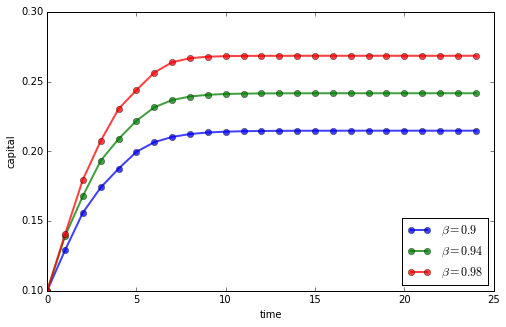

In [4]:
from scipy import interp

gm = GrowthModel() 
w = 5 * gm.u(gm.grid) - 25  # To be used as an initial condition
discount_factors = (0.9, 0.94, 0.98)
series_length = 25

fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlabel("time")
ax.set_ylabel("capital")
ax.set_ylim(0.10, 0.30)

for beta in discount_factors:

    # Compute the optimal policy given the discount factor
    gm.beta = beta
    v_star = compute_fixed_point(gm.bellman_operator, w, max_iter=20)
    sigma = gm.compute_greedy(v_star)

    # Compute the corresponding time series for capital
    k = np.empty(series_length)
    k[0] = 0.1
    sigma_function = lambda x: interp(x, gm.grid, sigma)
    for t in range(1, series_length):
        k[t] = gm.f(k[t-1]) - sigma_function(k[t-1])
    ax.plot(k, 'o-', lw=2, alpha=0.75, label=r'$\beta = {}$'.format(beta))

ax.legend(loc='lower right')
plt.show()